<a href="https://colab.research.google.com/github/CsCheems/AirQuality-HeartDisease/blob/master/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

url = "https://archive.ics.uci.edu/static/public/45/data.csv"
df = pd.read_csv(url);
df.head()




,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [9]:
X = df.drop("num", axis=1)

y = df["num"]

In [10]:

#Imputamos los valores faltantes
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

#Escalar caracteristicas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [11]:
#Dividimos el train y test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)

In [12]:
#Modelo de Random forest
print("== Random Forest ==")
print("Precision:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

#Modelo KNN
print("== KNN ==")
print("Precision:", accuracy_score(y_test, knn_preds))
print(classification_report(y_test, knn_preds))

== Random Forest ==
Precision: 0.4918032786885246
              precision    recall  f1-score   support

           0       0.72      0.97      0.82        29
           1       0.09      0.08      0.09        12
           2       0.17      0.11      0.13         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.49        61
   macro avg       0.20      0.23      0.21        61
weighted avg       0.38      0.49      0.43        61

== KNN ==
Precision: 0.5573770491803278
              precision    recall  f1-score   support

           0       0.72      1.00      0.84        29
           1       0.36      0.33      0.35        12
           2       0.17      0.11      0.13         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.56        61
   macro avg       0.25      0.29      0.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


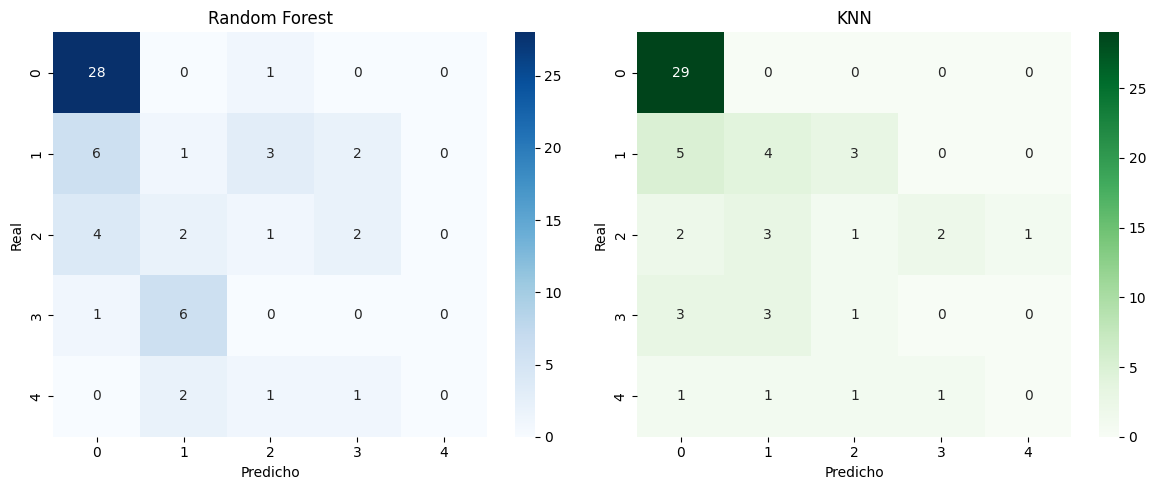

In [13]:
#Matrices de confusion
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title("Random Forest")
axs[0].set_xlabel("Predicho")
axs[0].set_ylabel("Real")

sns.heatmap(confusion_matrix(y_test, knn_preds), annot=True, fmt='d', cmap='Greens', ax=axs[1])
axs[1].set_title("KNN")
axs[1].set_xlabel("Predicho")
axs[1].set_ylabel("Real")

plt.tight_layout()
plt.show()